In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import log as ln
import seaborn as sns
import mplstereonet


In [2]:
def eval_dips(file_path):

    df2 = pd.read_csv(file_path)

    #Elimina filas sin datos en la columna familia
    df2 = df2.dropna(subset=['fam'])

    #Anade zeros a donde no halla JRC o JCS
    if 'jrc' not in df2.columns or 'jcs' not in df2.columns:
        if 'jrc' not in df2.columns:
            df2['jrc'] = np.zeros(len(df2))
        if 'jcs' not in df2.columns:
            df2['jcs'] = np.zeros(len(df2))

    #Agrupa por familia y saca promedio y dev std
    grouped2 = df2.groupby('fam').agg({'dip': [np.mean, np.std], 'dip_direction': [np.mean, np.std],'jrc': [np.mean, np.std],'jcs': [np.mean, np.std]})

    result2 = pd.DataFrame(columns=['mean_dip', 'std_dip', 'mean_dip_dir', 'std_dip_dir','mean_jrc','std_jrc','mean_jcs','std_jcs'])

    #Las ordena en un dataframe
    for i, row in grouped2.iterrows():
        result2.loc[i] = [row[('dip', 'mean')], row[('dip', 'std')], row[('dip_direction', 'mean')], row[('dip_direction', 'std')],row[('jrc', 'mean')], row[('jrc', 'std')],row[('jcs', 'mean')], row[('jcs', 'std')]]

    result2 = result2.round(2).applymap('{:.2f}'.format)

    result2 = result2.rename_axis('fam')

    #Convierte las columnas del dataframe a Float
    result2 = result2.astype(float)




    #Grafica el estereograma segun mplstereonet

    #fig = plt.figure() 
    #ax = fig.add_subplot(111,projection= 'equal_area_stereonet')

    fig,ax = mplstereonet.subplots(figsize=(7,7))
    #projection=polar?

    #Define dip and dip-direction
    dip = result2.mean_dip
    dip_dir = result2.mean_dip_dir + 270  #Se le suma 270 porque no se corregir el azimuth en el codigo base.

    ax.plane(dip_dir[1], dip, 'b-', linewidth=2)
    ax.plane(dip_dir[2], dip, 'r-', linewidth=2)
    ax.plane(dip_dir[3], dip, 'g-', linewidth=2)
    ax.pole(dip_dir[1], dip[1],'bo', markersize=6)
    ax.pole(dip_dir[2], dip[2],'r^', markersize=6)
    ax.pole(dip_dir[3], dip[3],'g*', markersize=6)

    #Densidades
    #ax.density_contourf(dip_dir,dip,cmap='gist_earth')
    #ax.density_contour(dip_dir,dip,colors='black')


    #Interseccion
    #plunge,bearing=mplstereonet.plane_intersection(dip_dir[1],dip[1],dip_dir[2],dip[2])
    #ax.line(plunge,bearing,marker='*',markersize=15)


    ax.grid(True)

    #polo=bz+90 hacia adentro
    #ax.set_azimuth_ticklabels([])
    
    ax.set_title('Stereonet',y=1.3)

    display(result2)
    plt.show() 

,mean_dip,std_dip,mean_dip_dir,std_dip_dir,mean_jrc,std_jrc,mean_jcs,std_jcs
fam,,,,,,,,
1.0,61.78,8.62,292.43,12.68,5.37,3.07,144.57,52.69
2.0,53.92,7.73,194.22,13.16,8.21,3.84,95.97,40.01
3.0,52.54,16.66,54.31,17.28,6.38,3.66,136.32,62.59


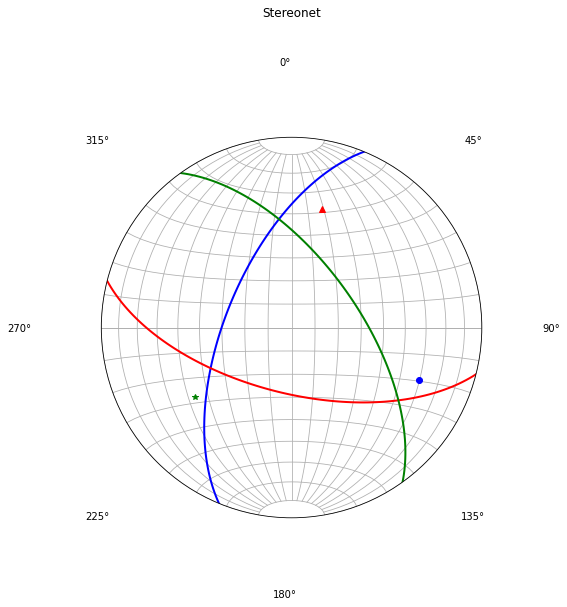

In [3]:
eval_dips('C:/Users/USUARIO/Documents/Curso Python/Discontinuidades/valores_campo.csv')

,mean_dip,std_dip,mean_dip_dir,std_dip_dir,mean_jrc,std_jrc,mean_jcs,std_jcs
fam,,,,,,,,
1,60.17,1.47,295.00,4.29,0.0,0.0,0.0,0.0
2,55.33,1.86,197.17,2.14,0.0,0.0,0.0,0.0
3,67.00,13.27,70.00,7.38,0.0,0.0,0.0,0.0


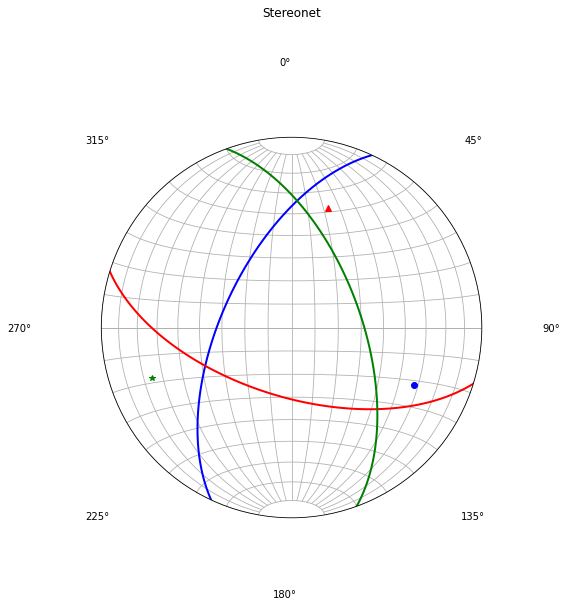

In [4]:
eval_dips('C:/Users/USUARIO/Documents/Curso Python/Discontinuidades/valores_dsc.csv')

In [5]:
df2 = pd.read_csv('C:/Users/USUARIO/Documents/Curso Python/Discontinuidades/safety_factor.csv')
df2_wide = pd.pivot_table(df2,index='range',values=['joint_1_jcs','joint_1_jrc','joint_1_phir','joint_2_jcs','joint_2_jrc','joint_2_phir'])
df2_wide


,joint_1_jcs,joint_1_jrc,joint_1_phir,joint_2_jcs,joint_2_jrc,joint_2_phir
range,,,,,,
0,1.104827,1.089598,1.059745,1.103372,1.083486,1.041916
1,1.104873,1.089940,1.060652,1.103448,1.083949,1.043165
2,1.104919,1.090283,1.061560,1.103525,1.084412,1.044416
3,1.104964,1.090626,1.062470,1.103600,1.084876,1.045669
4,1.105010,1.090970,1.063381,1.103676,1.085340,1.046924
...,...,...,...,...,...,...
96,1.108820,1.123513,1.154389,1.110044,1.129298,1.172255
97,1.108858,1.123877,1.155467,1.110108,1.129790,1.173738
98,1.108896,1.124242,1.156546,1.110171,1.130282,1.175225


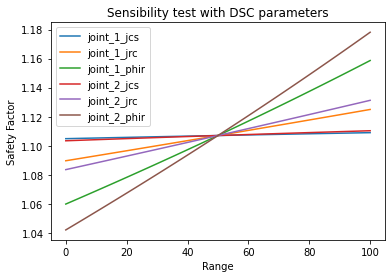

In [6]:
df2_wide.plot()
plt.xlabel('Range')
plt.ylabel('Safety Factor')
plt.title('Sensibility test with DSC parameters')
plt.show()

In [7]:
def calculo_phii(phib,jrc,jcs):

    signmin = 10**(np.log10(jcs)-(70-phib)/jrc)

    #Creates the columns
    signmin_i = []
    tau_t = []
    phi_i = []
    coh_i = []

    #Excetutes the formula
    while jcs >= signmin:

        tau = signmin*np.tan((phib+jrc*np.log10(jcs/signmin))*np.pi/180)
        dtds = np.tan((jrc*np.log10(jcs/signmin)+phib)*np.pi/180)-(jrc/ln(10))*(np.tan((jrc*np.log10(jcs/signmin)+phib)*np.pi/180)**2+1)*np.pi/180
        phi = np.arctan(dtds)*180/np.pi
        coh = tau-signmin*dtds
    
        signmin_i.append(signmin)
        tau_t.append(tau)
        phi_i.append(phi)
        coh_i.append(coh)

        signmin=signmin*2

    #Adds the info to a dataframe
    t_v_s = pd.DataFrame({'sign': signmin_i, 'tau' : tau_t, 'phi_i': phi_i,'coh_i':coh_i })

    #Plots
    display(t_v_s)
    sns.lineplot(data = t_v_s, x = 'sign', y = 'tau')
    plt.title('Shear strenght vs Normal strenght')
    sns.set_style("darkgrid", {"axes.facecolor": ".8"})
    plt.show()

,sign,tau,phi_i,coh_i
0,0.359945,0.988940,58.818491,0.394167
1,0.719889,1.537679,54.911106,0.512958
2,1.439779,2.476291,50.494965,0.730012
3,2.879557,4.072636,45.846303,1.106730
4,5.759114,6.779003,41.072266,1.759914
5,11.518229,11.343841,36.223142,2.906625
6,23.036458,18.973292,31.325692,4.952753
7,46.072916,31.532791,26.395507,8.666500
8,92.145832,51.711404,21.442319,15.521313


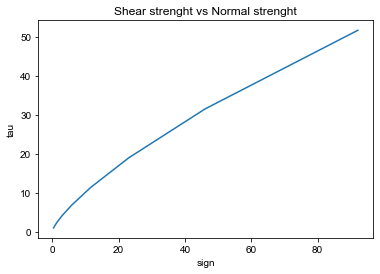

In [8]:
calculo_phii(29,16.9,96)

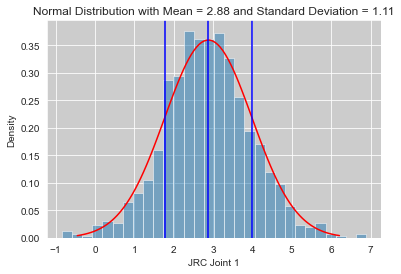

In [9]:
def plot_normal_distribution(mean, std_dev):
    # generate 1000 random samples from a normal distribution with the given mean and standard deviation
    samples = np.random.normal(mean, std_dev, size=1000)
    
    # create a histogram of the samples
    plt.hist(samples, bins=30, density=True, alpha=0.5)
    
    # create a normal distribution curve based on the mean and standard deviation
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    y = 1/(std_dev * np.sqrt(2*np.pi)) * np.exp(-(x-mean)**2/(2*std_dev**2))
    plt.plot(x, y, color='r')
    
    # set the title and labels for the graph
    plt.title("Normal Distribution with Mean = {} and Standard Deviation = {}".format(mean, std_dev))
    plt.xlabel("JRC Joint 1")
    plt.ylabel("Density")
    plt.axvline(x=mean,color='b')
    plt.axvline(x=mean-std_dev,color='b')
    plt.axvline(x=mean+std_dev,color='b')
    # show the graph
    plt.show()

plot_normal_distribution(2.88, 1.11)